## Credit Card Fraud Detection System
Using python 3 environment to predict fraud in credit card dataset. From this link https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud Speaking about the dataset.
In summary, The context of this analysis is to be able to identify and eliminate fraudulent credit card activities when people purchase goods online usin their credit card, through the analysis and deployment of this project, companies can be able to detect fraudulent transactions just so that customers are not charged for goods they did not purchase.

In [1]:
### Import libraries
import numpy as np    ### Dealing with arrays
import pandas as pd  ### Dealing with dataframes
import seaborn as sns  ### Plotting
import matplotlib.pyplot as plt  ###plotting
from sklearn.model_selection import cross_validate  ### Cross validate 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from collections import Counter

In [2]:
## Import Dataset
credit_data = pd.read_csv("creditcard.csv")
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [11]:
# Assuming you have a dataset loaded in credit_data

# Separating features and target
features = credit_data.drop('Class', axis=1)  # Assuming 'Class' is the target column
target = credit_data['Class']

# Apply SMOTE for balancing the dataset
smote = SMOTE(random_state=42)
features_sm, target_sm = smote.fit_resample(features, target)

credit_data.shape


(284807, 31)

#### Dataset content
This dataset has *284807* rows with *31* columns. The dataset contains transactions made by credit cards in September 2013 by some European Cardholders. This dataset contains transactions that happened in 2 days and contains about 492 frauds out of 284807 transactions. This dataset is extremely biased accounting for just *0.172%* of the dataset being positive.
This dataset contains only numerical input variables which are results of a PCA transformation of the original dataset. For confidentiality purposes, the original dataset is not available online. The features **Time** and **Amount** are the only features which have not be transformed by PCA with time describing the time the transaction happened, and amount describing the amount spent on the item bought. The feature **Class** explains the target variable describing whether a transaction was flagged as fraud or not using binary representations *(0 and 1)*

In [4]:
def dataset_information(dataset):
    
    print("SHAPE: ",np.shape(np.array(dataset)))
    print("FEATURES: ",dataset.columns[:-1])
    print("TARGET: ",dataset.columns[-1])

dataset_information(credit_data)

SHAPE:  (284807, 31)
FEATURES:  Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')
TARGET:  Class


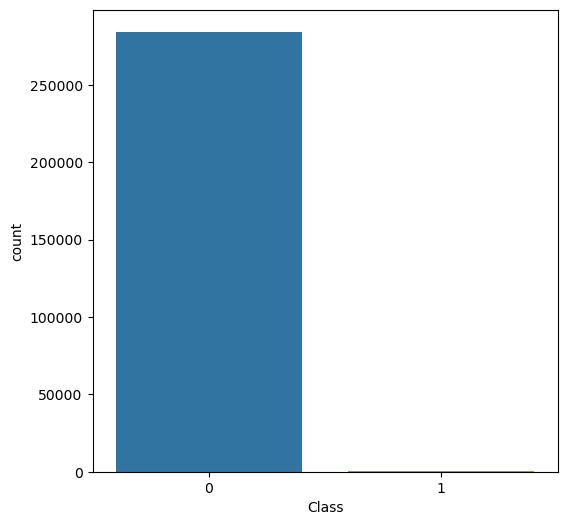

In [5]:
### Visualize our dataset
plt.figure(figsize=(6,6))
sns.countplot(x=credit_data["Class"])
plt.show()

# Define features and target
features = credit_data.drop('Class', axis=1)
target = credit_data['Class']

# Apply SMOTE for resampling
smote = SMOTE(random_state=42)
features_sm, target_sm = smote.fit_resample(features, target)

# Now split the dataset
features_train, features_test, target_train, target_test = train_test_split(features_sm, target_sm, test_size=0.2, random_state=42)

# Fitting the Logistic Regression model
logistic_reg = LogisticRegression(max_iter=1000)
fitted_log_model = logistic_reg.fit(features_train, target_train)
log_predictions = fitted_log_model.predict(features_test)

# Evaluating the model
print(confusion_matrix(target_test, log_predictions))
print(accuracy_score(target_test, log_predictions))


#### Model Fitting and Selection Decision Tree & Logistics Regression
__Decision Tree__:
This is a popular machine learning algorithm for predicting outcomes, It uses tree based structures by finding out or generating the optimal predictors to solve the problem.

__Logistic Regression__:
According to statistics solution, a logistic regression is a kind of regression to conduct when the outcome variable is binary(of two different classes). Logistics regression is used to describe and explain the relationship between a dependent target binary variable with one or more independent feature variables.

In [6]:

## First we split our dataset into train and test dataset, 
# our training dataset takes 80% of the entire dataset, leaving 20% for the Test.
features_train, features_test, target_train, target_test = train_test_split(features_sm, target_sm, test_size= .2)

## Fitting our Logistic Regression model on our resampled data
logistic_reg = LogisticRegression()
fitted_log_model = logistic_reg.fit(features_train, target_train)
log_predictions = fitted_log_model.predict(features_test)

print(confusion_matrix(target_test, log_predictions))
print(accuracy_score(target_test, log_predictions))

[[55930   986]
 [ 1970 54840]]
0.9740077027240912


/home/dvooskid/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [7]:
## Fitting our Decision Tree model on our resampled data

## Using cross validation
tree = DecisionTreeClassifier(criterion='gini')
predictions = cross_validate(tree, features_sm, target_sm, cv=10)

print(predictions['test_score'])
print(np.mean(predictions['test_score']))


[0.96651601 0.99676415 0.99818863 0.99827656 0.99783691 0.99321175
 0.99862828 0.99825897 0.99634209 0.56651953]
0.9510542883773281


In [8]:
# tune the depth of the tree to avoid overfitting
# using param grid
param_grid = {'max_depth': np.arange(5,10)}
tree_mod = DecisionTreeClassifier(criterion='gini')
tree_grid = GridSearchCV(tree_mod, param_grid=param_grid)
tree_fitted = tree_grid.fit(features_train, target_train)
print(tree_fitted.best_params_)

predictions = tree_fitted.predict(features_test)

accuracy_score = accuracy_score(target_test, predictions)
confusion_matrix = confusion_matrix(target_test, predictions)


{'max_depth': 9}


In [9]:
print(confusion_matrix)
print(accuracy_score)

[[56235   681]
 [  560 56250]]
0.9890878075374145


<Figure size 600x600 with 0 Axes>

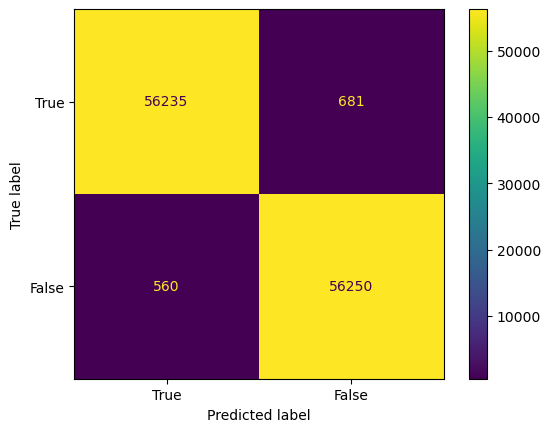

In [10]:
## Display confusion matrix
plt.figure(figsize=(6,6))
cm_plot = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, 
                                 display_labels=['True', 'False'])
cm_plot.plot()
plt.show()